In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model_path = "../eyenet_model_52k_ds.h5"
model = load_model(model_path)

# Class labels (adjust if needed)
class_labels = ['Cataract', 'Conjunctivitis', 'Healthy', 'Stye']

In [2]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, target_size)
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)
    return img_rgb, img_resized

In [3]:
def predict_and_show(image_path):
    original_image, preprocessed_image = preprocess_image(image_path)

    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]

    print(f"✅ Predicted: {class_labels[predicted_class]} ({confidence:.2%})")
    print(f"Class probabilities:")
    for i, prob in enumerate(predictions[0]):
        print(f"  {class_labels[i]}: {prob:.2%}")

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

In [28]:
def main():
    # Replace with your test image path
    image_paths = [
        r"C:\Users\User\Desktop\ALL_DATA\Cataract_Test_Data\test6.jpg"
    ]
    for image_path in image_paths:
        print(f"Predicting {image_path}")
        predict_and_show(image_path)

Predicting C:\Users\User\Desktop\ALL_DATA\Cataract_Test_Data\test6.jpg
1/1 [==============================] - 0s 21ms/step
✅ Predicted: Cataract (100.00%)
Class probabilities:
  Cataract: 100.00%
  Conjunctivitis: 0.00%
  Healthy: 0.00%
  Stye: 0.00%


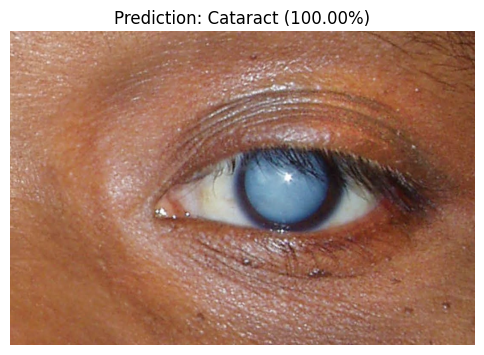

In [29]:
main()